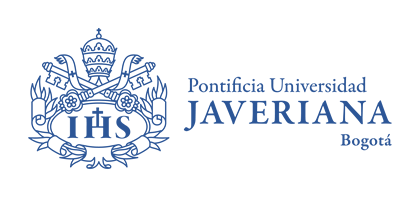

# Proyecto de grado - Exploring Data modelo CNN para clasificación de presencia o ausencia de ruido

- Juan Sebastián Vargas Torres
- Jessica Tatiana Naizaque Guevara
- Estefanía Bermúdez Arroyo

## Imports

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

In [ ]:
pip install odfpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 KB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=99b1140aa01b0aeee6eb6c69bedb28ac1ff6adcaf29cedaeb7649c23cbd37f2d
  Stored in directory: /root/.cache/pip/wheels/20/ff/69/1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy


## Nifi Files Info

In [ ]:
niftiFilesDataFrame = pd.read_csv("/content/filesDataframe.csv")

In [ ]:
niftiFilesDataFrame

,Unnamed: 0,FileName,HighresShape,LowresShape,FlairShape,T2wShape
0,0,sub-A057,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
1,1,sub-A068,"(360, 512, 512)","(170, 256, 256)","(1024, 1024, 25)","(360, 512, 512)"
2,2,DataCollector,NaN,NaN,NaN,NaN
3,3,sub-A066,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 23)","(340, 480, 480)"
4,4,sub-A092,"(340, 480, 480)","(170, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
5,5,sub-A059,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 23)","(340, 480, 480)"
6,6,sub-A095,"(340, 480, 480)","(160, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
7,7,sub-A061,"(350, 512, 512)","(160, 288, 288)","(1024, 1024, 25)","(350, 512, 512)"
8,8,sub-A035,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 24)","(340, 480, 480)"
9,9,sub-A032,"(350, 512, 512)","(170, 256, 256)","(1024, 1024, 25)","(350, 512, 512)"


In [ ]:
niftiFilesDataFrame.dtypes

Unnamed: 0       int64
FileName        object
HighresShape    object
LowresShape     object
FlairShape      object
T2wShape        object
dtype: object

In [ ]:
niftiFilesDataFrame.shape

(174, 6)

In [ ]:
index_to_drop= (niftiFilesDataFrame.loc[niftiFilesDataFrame["FileName"].astype(str)=="DataCollector"]).index
niftiFilesDataFrame.drop(index_to_drop,inplace = True)
index_to_drop= (niftiFilesDataFrame.loc[niftiFilesDataFrame["FileName"].astype(str)==".DS_Store"]).index
niftiFilesDataFrame.drop(index_to_drop,inplace = True)
index_to_drop= (niftiFilesDataFrame.loc[niftiFilesDataFrame["FileName"].astype(str)=="API"]).index
niftiFilesDataFrame.drop(index_to_drop,inplace = True)

In [ ]:
niftiFilesDataFrame.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
niftiFilesDataFrame.shape

(171, 5)

In [ ]:
niftiFilesDataFrame

,FileName,HighresShape,LowresShape,FlairShape,T2wShape
0,sub-A057,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
1,sub-A068,"(360, 512, 512)","(170, 256, 256)","(1024, 1024, 25)","(360, 512, 512)"
3,sub-A066,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 23)","(340, 480, 480)"
4,sub-A092,"(340, 480, 480)","(170, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
5,sub-A059,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 23)","(340, 480, 480)"
6,sub-A095,"(340, 480, 480)","(160, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"
7,sub-A061,"(350, 512, 512)","(160, 288, 288)","(1024, 1024, 25)","(350, 512, 512)"
8,sub-A035,"(340, 480, 480)","(150, 256, 256)","(1024, 1024, 24)","(340, 480, 480)"
9,sub-A032,"(350, 512, 512)","(170, 256, 256)","(1024, 1024, 25)","(350, 512, 512)"
10,sub-A004,"(340, 480, 480)","(160, 256, 256)","(1024, 1024, 25)","(340, 480, 480)"


In [ ]:
niftiFilesDataFrame.isna().sum()

FileName        0
HighresShape    3
LowresShape     0
FlairShape      3
T2wShape        3
dtype: int64

In [ ]:
for c in niftiFilesDataFrame.columns[1:]:
  print("*********",c,"*********")
  print(niftiFilesDataFrame[c].value_counts())
  print("*******************")
  print("\n")

********* HighresShape *********
(340, 480, 480)    137
(350, 512, 512)      6
(350, 480, 480)      5
(360, 512, 512)      4
(340, 512, 512)      4
(320, 480, 480)      2
(330, 480, 480)      2
(360, 528, 528)      2
(339, 480, 480)      2
(65, 480, 480)       1
(360, 480, 480)      1
(243, 480, 480)      1
(339, 528, 528)      1
Name: HighresShape, dtype: int64
*******************


********* LowresShape *********
(170, 256, 256)    127
(160, 256, 256)     24
(150, 256, 256)     17
(160, 288, 288)      1
(32, 256, 256)       1
(156, 240, 240)      1
Name: LowresShape, dtype: int64
*******************


********* FlairShape *********
(1024, 1024, 25)    125
(1024, 1024, 23)     25
(1024, 1024, 24)     12
(480, 480, 25)        2
(1024, 1024, 6)       1
(448, 448, 23)        1
(1024, 1024, 22)      1
(1024, 1024, 21)      1
Name: FlairShape, dtype: int64
*******************


********* T2wShape *********
(340, 480, 480)    139
(350, 480, 480)      6
(350, 512, 512)      5
(360, 512, 512)

In [ ]:
niftiFilesDataFrame = niftiFilesDataFrame[["FileName","HighresShape","LowresShape"]]

In [ ]:
niftiFilesDataFrame.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
niftiFilesDataFrame["HighresShape"]=niftiFilesDataFrame["HighresShape"].astype(str)
niftiFilesDataFrame["LowresShape"]=niftiFilesDataFrame["LowresShape"].astype(str)

<ipython-input-16-65440f7c3e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niftiFilesDataFrame["HighresShape"]=niftiFilesDataFrame["HighresShape"].astype(str)
<ipython-input-16-65440f7c3e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niftiFilesDataFrame["LowresShape"]=niftiFilesDataFrame["LowresShape"].astype(str)


In [ ]:
modeHigh= niftiFilesDataFrame["HighresShape"].mode()
modeLow= niftiFilesDataFrame["LowresShape"].mode()

In [ ]:
modeHigh

0    (340, 480, 480)
dtype: object

In [ ]:
modeLow

0    (170, 256, 256)
dtype: object

In [ ]:
modeHigh='(340, 480, 480)'
modeLow = '(170, 256, 256)'

In [ ]:
candidateData = niftiFilesDataFrame.loc[((niftiFilesDataFrame['HighresShape']==modeHigh) & (niftiFilesDataFrame['LowresShape']==modeLow) )]

In [ ]:
candidateData.head(5)

,FileName,HighresShape,LowresShape
4,sub-A092,"(340, 480, 480)","(170, 256, 256)"
17,sub-A051,"(340, 480, 480)","(170, 256, 256)"
19,sub-A002,"(340, 480, 480)","(170, 256, 256)"
23,sub-A146,"(340, 480, 480)","(170, 256, 256)"
24,sub-A179,"(340, 480, 480)","(170, 256, 256)"


In [ ]:
candidateData.shape

(100, 3)

In [ ]:
for c in candidateData.columns[1:]:
  print("*********",c,"*********")
  print(candidateData[c].value_counts())
  print("*******************")
  print("\n")

********* HighresShape *********
(340, 480, 480)    100
Name: HighresShape, dtype: int64
*******************


********* LowresShape *********
(170, 256, 256)    100
Name: LowresShape, dtype: int64
*******************




## Noise Labels

In [ ]:
noiseLabelsData = pd.read_excel("/content/noiseData.xlsx")

In [ ]:
noiseLabelsData.head(5)

,FileName,Sesion,Quality,Type,Label
0,AOS/sub-A002,ses-01,acq-highres,T1w.nii,1
1,AOS/sub-A002,ses-01,acq-lowres,T1w.nii,1
2,AOS/sub-A003,ses-01,acq-highres,T1w.nii,2
3,AOS/sub-A003,ses-01,acq-lowres,T1w.nii,1
4,AOS/sub-A003,ses-02,acq-highres,T1w.nii,2


In [ ]:
noiseLabelsData.shape

(378, 5)

In [ ]:
noiseLabelsData['FileName']= noiseLabelsData['FileName'].str.replace("AOS/","")

In [ ]:
for c in noiseLabelsData.columns:
  print("*********",c,"*********")
  print(noiseLabelsData[c].value_counts())
  print("*******************")
  print("\n")

********* FileName *********
sub-A039    4
sub-A095    4
sub-A030    4
sub-A019    4
sub-A061    4
sub-A121    4
sub-A015    4
sub-A032    4
sub-A003    4
sub-A071    4
sub-A006    4
sub-A049    4
sub-A088    4
sub-A148    3
sub-A047    3
sub-A172    2
sub-A168    2
sub-A169    2
sub-A170    2
sub-A002    2
sub-A173    2
sub-A174    2
sub-A167    2
sub-A176    2
sub-A177    2
sub-A179    2
sub-A180    2
sub-A181    2
sub-A182    2
sub-A175    2
sub-A159    2
sub-A165    2
sub-A162    2
sub-A137    2
sub-A139    2
sub-A141    2
sub-A142    2
sub-A145    2
sub-A146    2
sub-A147    2
sub-A150    2
sub-A151    2
sub-A152    2
sub-A153    2
sub-A154    2
sub-A155    2
sub-A156    2
sub-A157    2
sub-A160    2
sub-A161    2
sub-A183    2
sub-A193    2
sub-A184    2
sub-C057    2
sub-C022    2
sub-C024    2
sub-C026    2
sub-C028    2
sub-C029    2
sub-C030    2
sub-C035    2
sub-C052    2
sub-C059    2
sub-A185    2
sub-C062    2
sub-C065    2
sub-C068    2
sub-C071    2
sub-C072    2
sub-C

In [ ]:
noiseLabelsData.drop(columns=['Type'],inplace=True)

In [ ]:
noiseLabelsData = noiseLabelsData.loc[(noiseLabelsData['Sesion']=='ses-01')]

## Join Data

In [ ]:
join_df=candidateData.merge(noiseLabelsData,how="inner",on="FileName")

In [ ]:
join_df.head(5)

,FileName,HighresShape,LowresShape,Sesion,Quality,Label
0,sub-A092,"(340, 480, 480)","(170, 256, 256)",ses-01,acq-highres,1
1,sub-A092,"(340, 480, 480)","(170, 256, 256)",ses-01,acq-lowres,1
2,sub-A051,"(340, 480, 480)","(170, 256, 256)",ses-01,acq-highres,1
3,sub-A051,"(340, 480, 480)","(170, 256, 256)",ses-01,acq-lowres,1
4,sub-A002,"(340, 480, 480)","(170, 256, 256)",ses-01,acq-highres,1


In [ ]:
join_df.shape

(200, 6)

In [ ]:
join_df.isna().sum()

FileName        0
HighresShape    0
LowresShape     0
Sesion          0
Quality         0
Label           0
dtype: int64

In [ ]:
for c in join_df.columns:
  print("*********",c,"*********")
  print(join_df[c].value_counts())
  print("*******************")
  print("\n")

********* FileName *********
sub-A092    2
sub-C072    2
sub-A175    2
sub-A181    2
sub-A126    2
sub-A110    2
sub-A117    2
sub-C029    2
sub-A128    2
sub-A180    2
sub-A174    2
sub-A173    2
sub-A145    2
sub-A051    2
sub-A189    2
sub-A116    2
sub-C017    2
sub-C028    2
sub-A111    2
sub-A127    2
sub-C026    2
sub-A118    2
sub-C021    2
sub-A008    2
sub-A172    2
sub-A161    2
sub-A159    2
sub-A192    2
sub-A022    2
sub-A079    2
sub-A102    2
sub-C004    2
sub-A133    2
sub-C035    2
sub-A134    2
sub-A194    2
sub-A160    2
sub-A167    2
sub-C059    2
sub-A151    2
sub-A156    2
sub-C057    2
sub-C068    2
sub-A169    2
sub-A132    2
sub-C005    2
sub-A157    2
sub-A168    2
sub-A150    2
sub-A006    2
sub-A039    2
sub-A065    2
sub-C030    2
sub-C008    2
sub-A136    2
sub-C024    2
sub-A114    2
sub-A113    2
sub-A147    2
sub-A176    2
sub-A182    2
sub-A185    2
sub-A112    2
sub-A123    2
sub-A124    2
sub-A170    2
sub-C071    2
sub-A184    2
sub-A183    2
sub-A

In [ ]:
high_res_data = join_df.loc[(join_df['Quality']=='acq-highres')]
low_res_data = join_df.loc[(join_df['Quality']=='acq-lowres')]

In [ ]:
high_res_data.drop(columns=['LowresShape'],inplace=True)
low_res_data.drop(columns=['HighresShape'],inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### HIGH_RES

In [ ]:
high_res_data.head(5)

,FileName,HighresShape,Sesion,Quality,Label
0,sub-A092,"(340, 480, 480)",ses-01,acq-highres,1
2,sub-A051,"(340, 480, 480)",ses-01,acq-highres,1
4,sub-A002,"(340, 480, 480)",ses-01,acq-highres,1
6,sub-A146,"(340, 480, 480)",ses-01,acq-highres,1
8,sub-A179,"(340, 480, 480)",ses-01,acq-highres,2


<AxesSubplot:>

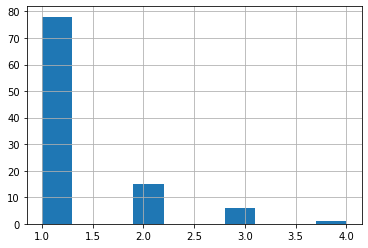

In [ ]:
high_res_data["Label"].hist()

In [ ]:
for c in high_res_data.columns[1:]:
  print("*********",c,"*********")
  print(high_res_data[c].value_counts())
  print("*******************")
  print("\n")

********* HighresShape *********
(340, 480, 480)    100
Name: HighresShape, dtype: int64
*******************


********* Sesion *********
ses-01    100
Name: Sesion, dtype: int64
*******************


********* Quality *********
acq-highres    100
Name: Quality, dtype: int64
*******************


********* Label *********
1    78
2    15
3     6
4     1
Name: Label, dtype: int64
*******************




In [ ]:
high_res_data.to_csv("high_res_data.csv")

In [ ]:
high_res_data.loc[(high_res_data['Label']==1)].head(1)

,FileName,HighresShape,Sesion,Quality,Label
0,sub-A092,"(340, 480, 480)",ses-01,acq-highres,1


In [ ]:
high_res_data.loc[(high_res_data['Label']==2)].head(1)

,FileName,HighresShape,Sesion,Quality,Label
8,sub-A179,"(340, 480, 480)",ses-01,acq-highres,2


In [ ]:
high_res_data.loc[(high_res_data['Label']==3)].head(1)

,FileName,HighresShape,Sesion,Quality,Label
12,sub-A177,"(340, 480, 480)",ses-01,acq-highres,3



LABEL 1:

![picture](https://drive.google.com/uc?export=view&id=1YaVUXlB3xT2TrrdECk5l4_LrG0rV2PrH)


=================================================================

LABEL 2:

![picture](https://drive.google.com/uc?export=view&id=1fdfXCUPN-fpcjBra2fiEP785rOM3Jjws)


=================================================================

LABEL 3:


![picture](https://drive.google.com/uc?export=view&id=1-ahnKPj-V_At_UBEKC6Zl0X3DKh0A1in)



### LOW_RES

In [ ]:
low_res_data.head(5)

,FileName,LowresShape,Sesion,Quality,Label
1,sub-A092,"(170, 256, 256)",ses-01,acq-lowres,1
3,sub-A051,"(170, 256, 256)",ses-01,acq-lowres,1
5,sub-A002,"(170, 256, 256)",ses-01,acq-lowres,1
7,sub-A146,"(170, 256, 256)",ses-01,acq-lowres,1
9,sub-A179,"(170, 256, 256)",ses-01,acq-lowres,2


In [ ]:
for c in low_res_data.columns[1:]:
  print("*********",c,"*********")
  print(low_res_data[c].value_counts())
  print("*******************")
  print("\n")

********* LowresShape *********
(170, 256, 256)    100
Name: LowresShape, dtype: int64
*******************


********* Sesion *********
ses-01    100
Name: Sesion, dtype: int64
*******************


********* Quality *********
acq-lowres    100
Name: Quality, dtype: int64
*******************


********* Label *********
1    89
2     9
3     2
Name: Label, dtype: int64
*******************




In [ ]:
low_res_data.loc[(low_res_data['Label']==1)].head(1)

,FileName,LowresShape,Sesion,Quality,Label
1,sub-A092,"(170, 256, 256)",ses-01,acq-lowres,1


In [ ]:
low_res_data.loc[(low_res_data['Label']==2)].head(1)

,FileName,LowresShape,Sesion,Quality,Label
9,sub-A179,"(170, 256, 256)",ses-01,acq-lowres,2


In [ ]:
low_res_data.loc[(low_res_data['Label']==3)].head(1)

,FileName,LowresShape,Sesion,Quality,Label
125,sub-A145,"(170, 256, 256)",ses-01,acq-lowres,3



LABEL 1:

![picture](https://drive.google.com/uc?export=view&id=19wDuUurMEViN70OilNpV9Y2G-6I1Sbt1)

=================================================================

LABEL 2:


![picture](https://drive.google.com/uc?export=view&id=1HBgmiNS0slH2u707oSw0LINzN8kGWJnT)


=================================================================

LABEL 3:

![picture](https://drive.google.com/uc?export=view&id=18KX8cGqcCfXLst0qQ65WpLdJyQheYjsE)